# <b>ANOVA Testing</b>

In [29]:
#Importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

In [4]:
#Loading data
data = pd.read_csv('marketing_sales_dataANOVA.csv')

In [6]:
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


##### The features in the data are:

##### 1. TV promotion budget (in Low, Medium, and High categories)
##### 2. Social media promotion budget (in millions of dollars)
##### 3. Radio promotion budget (in millions of dollars)
##### 4. Sales (in millions of dollars)
##### 5. Influencer size (in Mega, Macro, Nano, and Micro categories)

### <B>Data Exploration</B>

##### BoxPlot between Sales and TV to determine how much Sales vary based on TV promotion budget

<Axes: xlabel='TV', ylabel='Sales'>

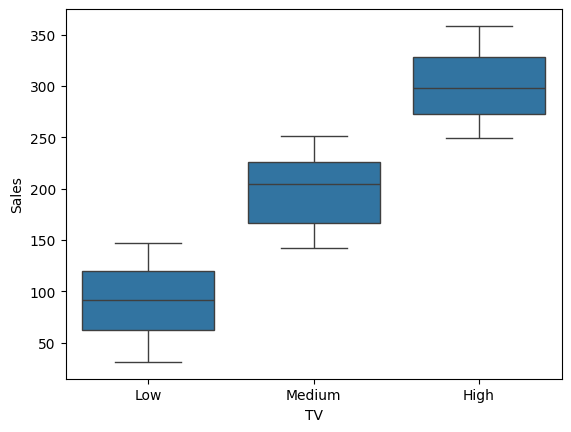

In [14]:
sns.boxplot(x="TV",y="Sales",data=data)

##### There is considerable variation in Sales across the TV groups. The significance of these differences can be tested with a one-way ANOVA.

##### BoxPlot between Sales and Influencer to determine how much Sales vary based on Influencer Size

<Axes: xlabel='Influencer', ylabel='Sales'>

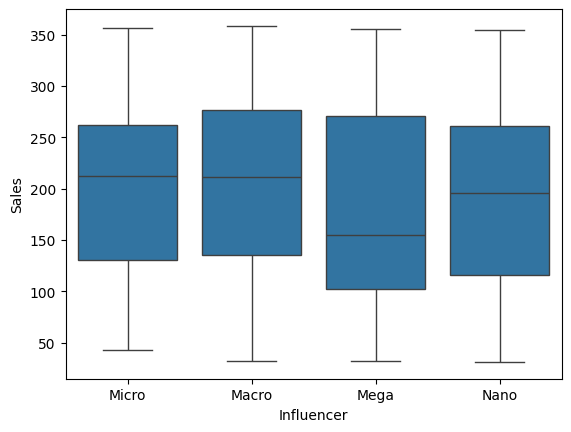

In [15]:
sns.boxplot(x="Influencer",y="Sales", data=data)

##### There is some variation across Influencer group but it is not much significant

##### <B>Removing Missing Data</B>

In [16]:
#Checking if there are any null rows
data.isna().any(axis=1).sum()

3

In [19]:
#Dropping null
data= data.dropna(axis=0)

In [20]:
#Rechecking if there are any null rows
data.isna().any(axis=1).sum()

0

### <B>Data Modelling</B>

In [21]:
ols_formula = 'Sales ~ C(TV)'
OLS =ols(formula =ols_formula,data=data)

In [22]:
model = OLS.fit()

In [24]:
model_summary = model.summary()

#### <B>Checking Model Assumptions</B>

##### <B>Assumption # 01 Linearity</b>

###### No continious variable hence no need to check this assumption

##### <B>Assumption # 02 Normaility</b>

In [25]:
residual = model.resid

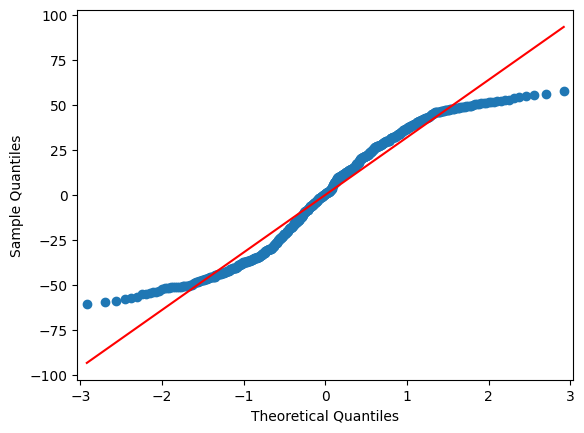

In [30]:
fig = sm.qqplot(residual,line='s')
plt.show()

###### Residuals appear in straight line hence normality is not violated

##### <B>Assumption # 03 Independence</b>

###### The independent observation assumption states that each observation in the dataset is independent. As each marketing promotion (row) is independent from one another, the independence assumption is not violated.

##### <B>Assumption # 04 Homoscadicity</b>

In [32]:
fitted_value = model.fittedvalues

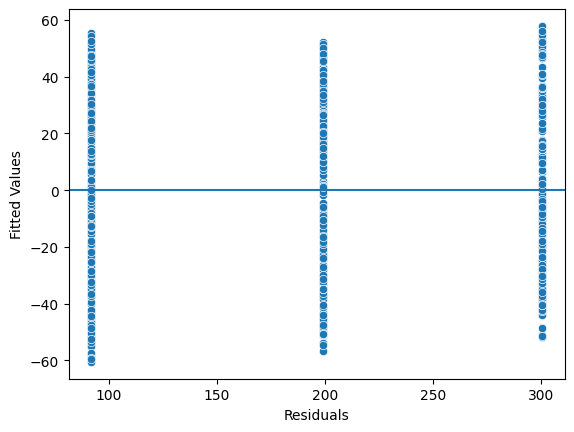

In [35]:
fig = sns.scatterplot(x= fitted_value, y = residual)
fig.axhline(0)
fig.set_xlabel("Residuals")
fig.set_ylabel("Fitted Values")
plt.show()

###### The variance where there are fitted values is similarly distributed, validating that the Homoscadicity assumption is met.

### <b>Result and Evaluation </b>

In [38]:
model_summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     1971.
Date:                Thu, 30 Jan 2025   Prob (F-statistic):          8.81e-256
Time:                        09:33:29   Log-Likelihood:                -2778.9
No. Observations:                 569   AIC:                             5564.
Df Residuals:                     566   BIC:                             5577.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         300.5296      2.417    124.360      0.000     295.783     305.276
C(TV)[T.Low]     -208.8133      3.329    -62.720      0.000    -215.353    -202.274
C(TV)[T.Medium]  -101.5061      3.325    -30.526      0.000    -108.038     -94.975
==============================================================================
Omnibus:                      450.714   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.763
Skew:                          -0.044   Prob(JB):                     1.71e-08
Kurtosis:                       1.775   Cond. No.                         3.86
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

###### The model explain <B>87.4%</b> of variation in Sales because of TV promotion which makes this model, an amazing predictor

###### The default category for TV promotion budget is HIGH, The model predicts that other two categories MEDIUM and LOW ar elower on average than HIGH. Like LOW is 208.81 (million $) lower than HIGH 
###### The p-value for all coefficients is  0.000, meaning all coefficients are statistically significant at  p=0.05. The 95% confidence intervals for each coefficient should be reported when presenting results to stakeholders. For instance, there is a  95% chance the interval  [−215.353,−202.274] contains the true parameter of the slope of BTVLow , which is the estimated difference in promotion sales when a Low TV promotion is chosen instead of a High TV promotion.

### <b>One-Way ANOVA</b>

In [37]:
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(TV),4.052692e+06,2.0,1971.455737,8.805550e-256
Residual,5.817589e+05,566.0,NaN,NaN


###### <b>Null Hypothesis (Ho)</b> : There is no difference in Sales based on the TV promotion budget.
###### <b>Alternate Hypothesis (H1)</b> : There is a difference in Sales based on the TV promotion budget. 

##### <B>Conclusion</B>

###### p-value is 8.805550e-256 much lower than 0.05. hence the null hypothesis is rejected

###### The results of the one-way ANOVA test indicate that you can reject the null hypothesis in favor of the alternative hypothesis. There is a statistically significant difference in Sales among TV groups.

### <B>ANOVA post hoc Test</B>

In [40]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [41]:
tukeyoneway = pairwise_tukeyhsd(endog=data['Sales'],groups=data['TV'],alpha=0.05)

In [42]:
tukeyoneway.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
High,Low,-208.8133,0.0,-216.6367,-200.9898,True
High,Medium,-101.5061,0.0,-109.3202,-93.6921,True
Low,Medium,107.3072,0.0,99.7066,114.9077,True


###### A post hoc test was conducted to determine which TV groups are different and how many are different from each other. This provides more detail than the one-way ANOVA results, which can at most determine that at least one group is different. Further, using the Tukey HSD controls for the increasing probability of incorrectly rejecting a null hypothesis from peforming multiple tests.

###### <B>The results were that Sales is not the same between any pair of TV groups.</B>